# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [5]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print ("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print ("Dataset could not be loaded. Is the file missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [6]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,16225,1825,1765,853,170,1067
2,3067,13240,23127,3941,9959,731


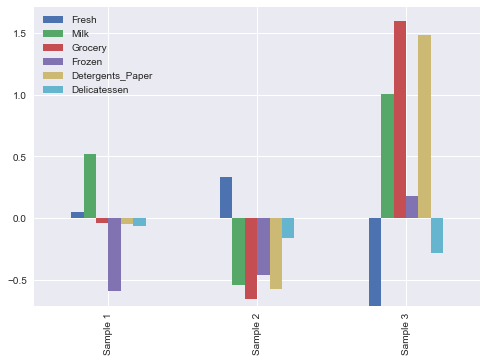

In [14]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [0, 150, 200]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print ("Chosen samples of wholesale customers dataset:")
display(samples)

import seaborn as sns

samples_for_plot = samples.copy()
samples_for_plot = (samples_for_plot - data.mean())/data.std()

labels = ['Sample 1','Sample 2','Sample 3']
samples_for_plot.plot(kind='bar')
_ = plt.xticks(range(3),labels)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

***Customer 0 *** : 

This customer is spending most on delicatessen among other two establishments and it is a bit less than the mean value for delicatessen. The mean for fresh items is very close to the expenditure on the fresh items, while there is a big expenditure on milk & grocery as compared to the mean. So considering these this customer could be a marketplace or a restaurant.

***Customer 1*** :

This establishment is spending most on fresh items and the value is significantly bigger than the mean. While it spends least amount on milk, grocery items and detergents_paper among others and the values are also way lower than the mean for these items, so it could be a retailer

***Customer 2*** :

This establishment is spending most among other two on milk, grocery, frozen items along with a huge amount on detergents_paper, and also the amount for all of these is way larger than their mean so it could be a cafe or a restaurant.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [34]:
#study all of the features over 100 randomly generated trials. Such an analysis can tell you a lot about the correlation between all of the features. 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

def calculate_r_2_for_feature(data,feature):
    new_data = data.drop(feature, axis=1)

    X_train, \
    X_test,  \
    y_train, \
    y_test = train_test_split(
        new_data,data[feature],test_size=0.25
    )

    regressor = DecisionTreeRegressor()
    regressor.fit(X_train,y_train)

    score = regressor.score(X_test,y_test)
    return score

def r_2_mean(data,feature,runs=200):
    return np.array([calculate_r_2_for_feature(data,feature) for _ in range(200) ]).mean().round(4)

print("{0:17} {1}".format("Fresh: ", r_2_mean(data,'Fresh')))
print("{0:17} {1}".format("Milk: ", r_2_mean(data,'Milk')))
print("{0:17} {1}".format("Grocery: ", r_2_mean(data,'Grocery')))
print("{0:17} {1}".format("Frozen: ", r_2_mean(data,'Frozen')))
print("{0:17} {1}".format("Detergents_Paper: ", r_2_mean(data,'Detergents_Paper')))
print("{0:17} {1}".format("Delicatessen: ", r_2_mean(data,'Delicatessen')))

Fresh:            -0.6819
Milk:             0.1
Grocery:          0.6756
Frozen:           -1.3796
Detergents_Paper:  0.6632
Delicatessen:     -3.4535


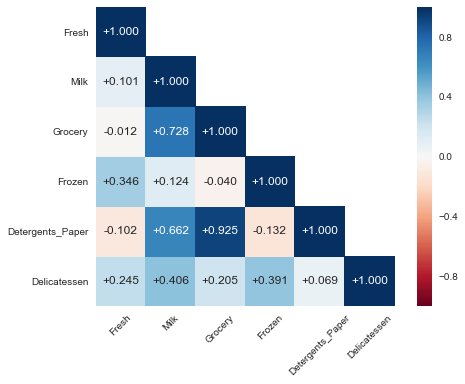

In [35]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='RdBu', fmt='+.3f')
    plt.xticks(rotation=45, ha='center')

### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**
1. I tried to predict the detergents_paper

2. The prediction score was 0.769

3. Since this feature got a high score with a decision tree regressor, it has some correlation with one or more other features. So it is not necessary for identifying the customer's spending and we can drop this feature.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**
1. The plots here shows that the data has no normality and is filled with few outliers specially in milk, fresh and grocery. Also most of the data appears to be near the origin and within a few thousands of range. Thus we need to remove the outliers and apply normalization to have a normally distributed data

2. By looking at the scatter matrix and the heatmap we can say that there is a strong correlation between grocery-detergents_paper. Grocery-milk also appears to have some moderate correlation.

3. The correlation between grocery and detergents_paper shows that detergents_paper isn't much relevant and we were right to drop it off. Also there is a slight correlation between milk and grocery but looking at the plot closely we can say they are relevant features and its a good idea to keep them

4. The data for the-detergents_paper seems to be positively skewed with most of the data points betweem 0-5000

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

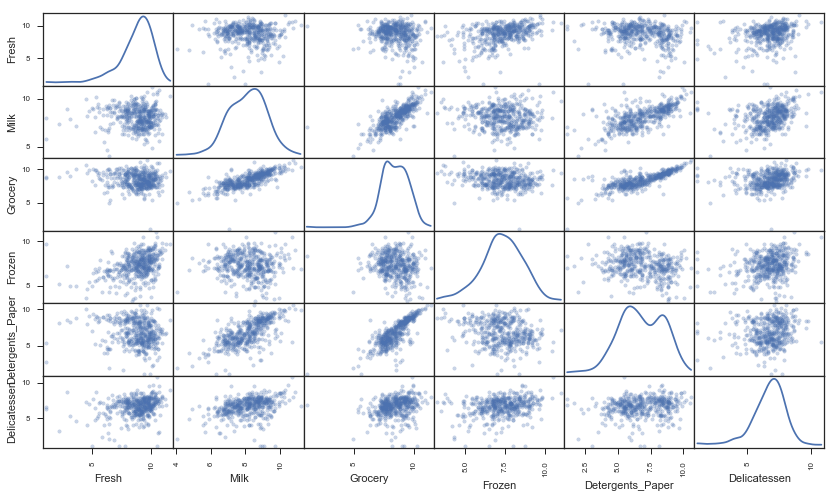

In [49]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

C:\Users\Honey\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


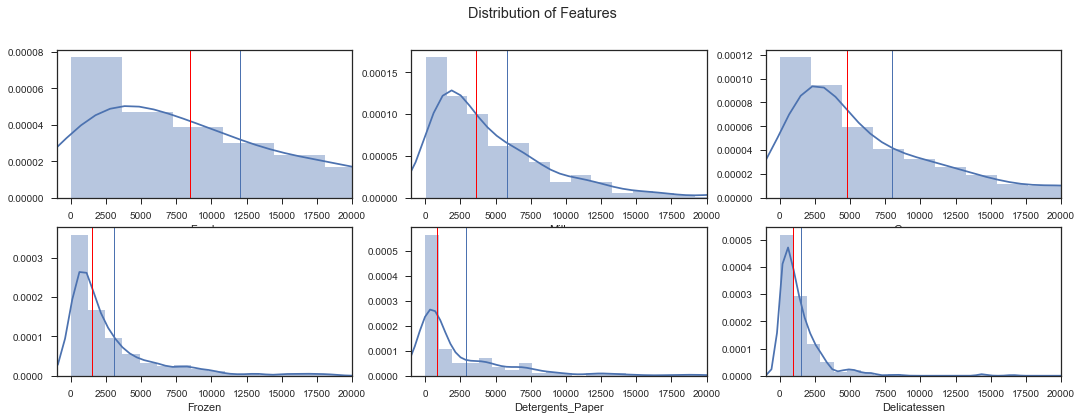

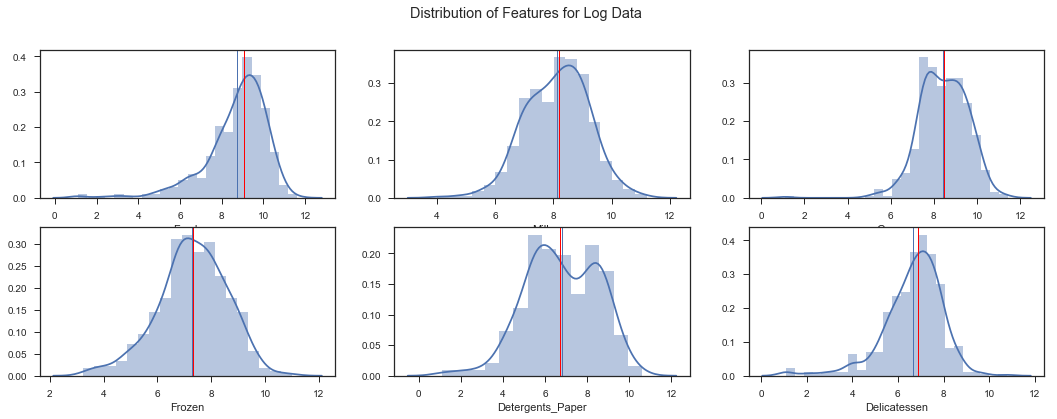

In [50]:
#See the distribution of data before and after scaling.

fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(18, 6)
fig.suptitle('Distribution of Features')

for i, col in enumerate(data.columns):
    feature = data[col]
    sns.distplot(feature, label=col, ax=axes[i]).set(xlim=(-1000, 20000),)
    axes[i].axvline(feature.mean(),linewidth=1)
    axes[i].axvline(feature.median(),linewidth=1, color='r')
    

#After preparing the log data, we can look at the distribution again:
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(18, 6)
fig.suptitle('Distribution of Features for Log Data')

for i, col in enumerate(log_data.columns):
    feature = log_data[col]
    sns.distplot(feature, label=col, ax=axes[i])
    axes[i].axvline(feature.mean(),linewidth=1)
    axes[i].axvline(feature.median(),linewidth=1, color='r')

C:\Users\Honey\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


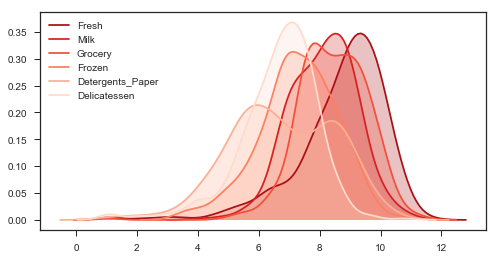

In [51]:
#To compare the log-transformed feature distributions, you can also plot them on top of each other with a seaborn KDE plot...
import matplotlib.pyplot as plt
import seaborn as sns
# set plot style & color scheme
sns.set_style('ticks')
with sns.color_palette("Reds_r"):
    # plot densities of log data
    plt.figure(figsize=(8,4))
    for col in data.columns:
        sns.kdeplot(log_data[col], shade=True)
    plt.legend(loc='best')

Strictly speaking, a principal component analysis assumes that data has a mean of zero and a variance of 1. If you think about it, the PCA is completely based upon the variance and co-variance in the data. This requires that the data can be completely described using the variance and co-variance i.e. that the mean is zero. We need to have the variance of each feature set to 1 so that no feature comes to dominate the PCA. To achieve this you can scale the log_data.

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(log_data)

log_data2 = scaler.transform(log_data)
log_samples = scaler.transform(log_samples)

# Display the log-transformed sample data
display(log_samples)

array([[ 0.48456094,  0.97606958,  0.43913249, -1.50841768,  0.6430006 ,
         0.40768457],
       [ 0.65190207, -0.5663286 , -0.86578217, -0.43071081, -0.95992601,
         0.23483047],
       [-0.47490148,  1.26831345,  1.44190824,  0.7620682 ,  1.40789459,
        -0.05401159]])

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [53]:
# For each feature find the data points with extreme high or low values
dict={}
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    #display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    display(outliers)
    dict[feature]=list(outliers.index)
    
#Count the frequency of values in dictionary and return recurring values
value_count={}
for key, value in dict.items():
    for i in value:
        if i in value_count.keys():value_count[i]+=1
        else:value_count[i]=1
    
final_count={}
for key, value in value_count.items():
    if value_count[key]>1:
        final_count[key]=value
        
print("Outliers :", final_count)

# OPTIONAL: Select the indices for data points you wish to remove

outliers  = list(final_count)

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print("Outliers removed :", outliers)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Outliers : {65: 2, 66: 2, 128: 2, 154: 3, 75: 2}
Outliers removed : [65, 66, 128, 154, 75]


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**
1. Yes there are several outliers data points common to more than one feature. The data points with index 65, 66, 128 & 75 are common to two features while data point 154 in common to three features

2. Yes we should remove these data points from the data set.

3. The data points we added to the list of outliers for removal were disturbing the distribution and their removal will give us a better scaled and distributed data. Also if these outliers were present they can shift the mean positions in the K-means algorithm failing to generalise the data.



## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

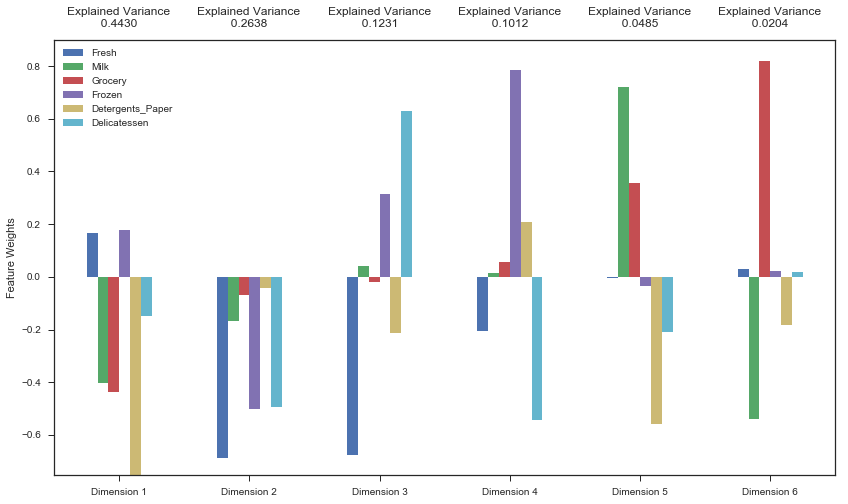

In [55]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components = 6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

1. The first principal component explains a total variance of  0.4430

2. The first & second principal component together explains a variance of (0.4430+0.2638) = 0.7068

3. a) Dimension 1 represents a high variance on detergents_paper in the negative direction and represents this feature well. It shows a correlation between detergents_paper, milk and grocery and has a high cumulative variance representing these three features very well while a very small cumulative variance of fresh & frozen items in the positive direction.
    This dimension might be representing a cafe.

   b) Dimension 2 shows a clear correlation between fresh, frozen and delicatessen along with a high cumulative variance between these three and thus representing these three features very well. It has the largest weight on fresh items.
   This dimension might be representing a restaurant.
   
   c) Dimension 3 shows a large variance on fresh items and delicatessen but in the opposite direction thus telling us that it is highly unlikely for an establishment to spend on both together.
   This establishment might represent either a deli or a retailer
   
   d) Dimension 4 shows a large variance on frozen items and delicatessen and in the opposite direction thus telling us an establishmenst will not spend on both of them together.
   This establishment could be deli or a marketplace
   
   e) Dimension 5 shows a large variance on milk and detergents_paper and in the opposite direction thus telling us it is unlikely that both these items are bought together.
   
   f) Dimension 6 shows a large variance on milk and grocery and in the opposite direction and with a very large variance on the grocery. It also tells us it is unlikely that both these items are bought together.

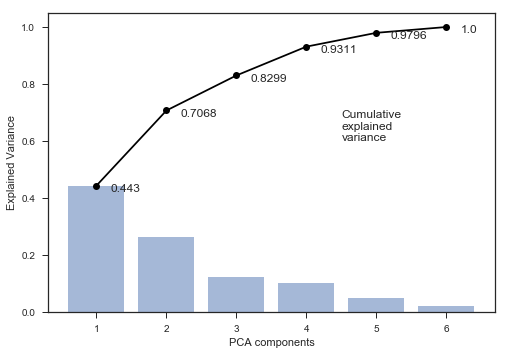

In [57]:
#show the cumulative variance:
# create an x-axis variable for each pca component
x = np.arange(1,7)

# plot the cumulative variance
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), '-o', color='black')

# plot the components' variance
plt.bar(x, pca.explained_variance_ratio_, align='center', alpha=0.5)

# plot styling
plt.ylim(0, 1.05)
plt.annotate('Cumulative\nexplained\nvariance',
             xy=(3.7, .88), xytext=(4.5, .6))
for i,j in zip(x, np.cumsum(pca.explained_variance_ratio_)):
    plt.annotate(str(j.round(4)),xy=(i+.2,j-.02))
plt.xticks(range(1,7))
plt.xlabel('PCA components')
plt.ylabel('Explained Variance')
plt.show()

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [58]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,8.9922,15.2335,0.0483,-3.6650,-2.9298,-2.1423
1,11.6336,15.0830,0.4686,-3.1874,-3.6082,-2.0639
2,8.1740,14.8310,0.9536,-1.2153,-2.7662,-1.6073


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [59]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [60]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,8.9922,15.2335
1,11.6336,15.0830
2,8.1740,14.8310


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

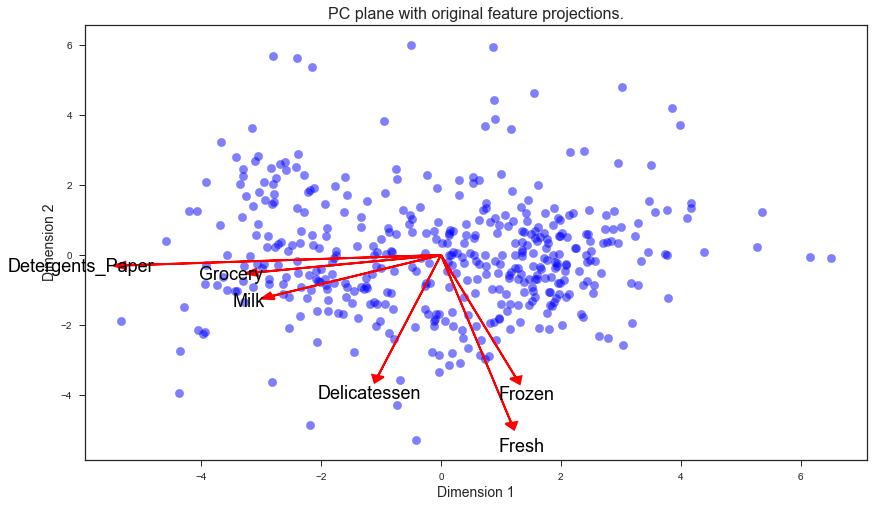

In [61]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

   ***1. Advantages of K-Means***
   
       1) Computationally faster
       2) Works well with large data & spherical cluster
       3) Works well with distinct data sets and where data points does not depend on each other
       
  ***2. Advantages of Gaussian Mixtures Model***
  
       1) More flexible and can take other shapes too
       2) It takes the covariance into consideration while making clusters and hence provide a mixed cluster where a data point can share more than one cluster.
       3) It also assigns a probability to each point to belong to a  certain cluster
       4) Also works well when there are some hidden or non observable parameters
       
  ***3. Choice of Algorithm***
        
        Considering our dataset we should go for Gaussian Mixtures Model. The reasons are :
        
       1) Our dataset has some features with significant covariance
       2) Our dataset has data points which might belong to more than one cluster and are not distinct to one category only

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [62]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

scores = {}

for k in range(2, 6):
    clusterer = GaussianMixture(n_components = k)
    clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    print("Silhouette Score for ", k , " clusters : ", score)
    scores[k] = score
    
_=[print("The maximum Silhouette Score is", v, "and is given by", k, "clusters") for k, v in scores.items() if v==max(scores.values())]

Silhouette Score for  2  clusters :  0.421916846463
Silhouette Score for  3  clusters :  0.318206831874
Silhouette Score for  4  clusters :  0.310399343809
Silhouette Score for  5  clusters :  0.304163074543
The maximum Silhouette Score is 0.421916846463 and is given by 2 clusters


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

Silhouette Score for  2  clusters :  0.422324682646

Silhouette Score for  3  clusters :  0.404248738241

Silhouette Score for  4  clusters :  0.288391596875

Silhouette Score for  5  clusters :  0.290432054875

We got the best Silhouette Score from 2 clusters

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

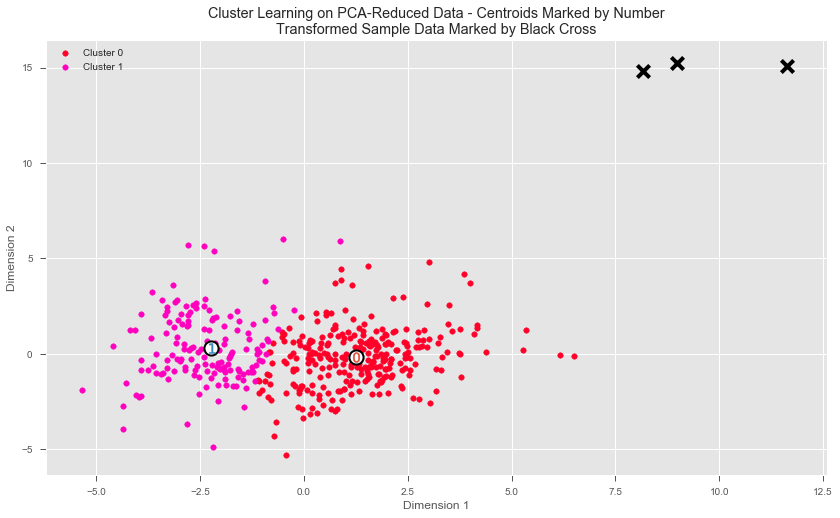

In [66]:
# Display the results of the clustering from implementation
clusterer = GaussianMixture(n_components = 2)
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_

vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3552.0,7837.0,12219.0,870.0,4696.0,962.0
Segment 1,8953.0,2114.0,2765.0,2075.0,353.0,732.0


([<matplotlib.axis.XTick at 0xc3cd710>,
 <a list of 4 Text xticklabel objects>)

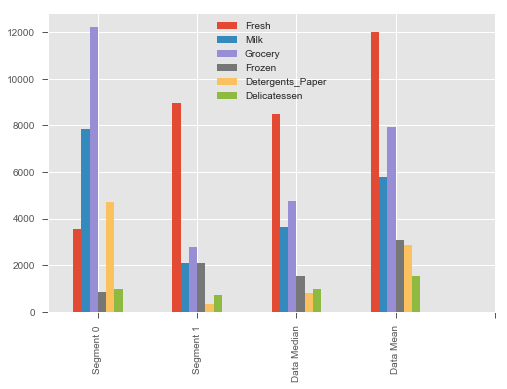

In [65]:
# TODO: Inverse transform the centers
#log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
#true_centers = scaler.inverse_transform(log_centers)
#true_centers = np.exp(true_centers)

# Display the true centers
#segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
#true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
#true_centers.index = segments
#display(true_centers)


# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

# visualize each segment in terms of the underlying features:
centers = true_centers.copy()
centers.loc[centers.shape[0]] = data.median()
centers.loc[centers.shape[0]] = data.mean()

plt.style.use('ggplot')
centers.plot(kind='bar')
labels = true_centers.index.values.tolist()
labels.append("Data Median")
labels.append("Data Mean")
plt.xticks(range(centers.shape[0]+1),labels)

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

In [78]:
display(np.exp(good_data).describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,12089.372414,5788.103448,7911.158621,3096.126437,2848.473563,1536.797701
std,12662.796341,7374.172350,9365.740973,4873.769559,4679.364623,2833.363881
min,3.000000,112.000000,218.000000,25.000000,3.000000,3.000000
25%,3208.000000,1579.500000,2156.000000,770.500000,260.000000,411.500000
50%,8565.000000,3634.000000,4757.000000,1541.000000,813.000000,967.000000
75%,16934.500000,7168.000000,10665.500000,3559.500000,3935.000000,1825.500000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**Answer:**

***Segment 0 :***

This segment includes the establishments which purchases large amounts of fresh items as compared to the segment 1. While it is below the average value for fresh items it is certainly significant as looking at the fresh items amount in the segment 1 we can say that the establishments whose fresh items purchases are somewhere near and more than the 50th percentile falls into this segment.

The milk, grocery & delicatessen purchases are significantly lower while detergents_paper purchases are way lower in this segment. The frozen items purchases is comparatively larger and near its mean.

Considering the points above this segment seems to best describe a marketplace or a retail establishment


***Segment 1 :***

This segment includes the establishments which purchases very large amounts of milk, grocery and detergents_paper and is way above their mean values. These establishments seems to be very different & opposite to the establishments in the segment 0. The fresh items & frozen items purchases are way lower than their mean values and delicatessen purchases are larger than in the segment 0.

Considering the points above this segment seems to best describe a cafe, a restaurant & a grocery store

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [83]:
# Display the predictions
display(samples)
for i, pred in enumerate(sample_preds):
    print ("Sample point", i, "predicted to be in Cluster", pred)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,16225,1825,1765,853,170,1067
2,3067,13240,23127,3941,9959,731


Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**

My prediction for sample point 0 was : a marketplace or a restuarant

My prediction for sample point 1 was : a retailer

My prediction for sample point 2 was : a cafe or a restaurant

My prediction for sample point 0 of being a marketplace is the only consistency with the actual predictions. While I predicted the sample point 1 & 2 to be a retailer & a cafe or restaurant, the actual prediction is opposite. But what i noticed here is the features which i considered to be the deciding factor for my early predictions are consistent with the actual predictions here.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

The two segments separates two types of establishments/customers. Segment 1 contains customers like cafes, restaurants and stores which rely on daily consumption of items and they need it fresh. While segment 0 contains customers like markets & retail stores which doesn't really need daily arrival of items; they store their items and sell them .

Now in order to determine how to plan the distribution, the wholesale distributor can take a subset of datapoints from both the segments and run a A/B test on these datapoints by diving them into two and testing 5 days & 3 days a week service on the subsets for both segments for one week. The feedback from the customers can help the distributor determine whom to give 5 days service and whom to give 3 days service.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

Now that we have defined clusters on our unlabeled customer segment data, we can apply supervised learning on it. Here we can use a classification algorithm and can use cluster segment as the target variable which here is considered as an engineered feature for the data and 'estimated product spending' as our predictor variables. We can use logistic regression or SVM and then use it to predict the label for the new customers.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

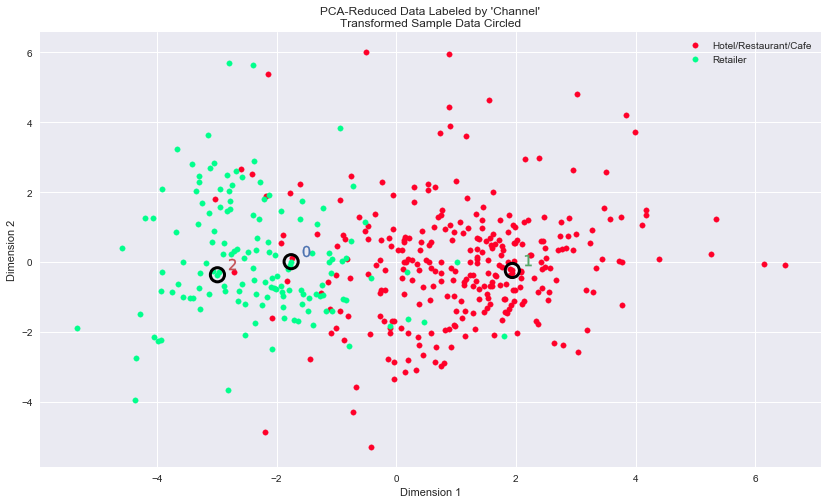

In [84]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

It works quite good. We can see our clustering algorithm separates the Hotel/Restaurant/Cafe customers and Retail customers very well.
Yes we can clearly see the purely classified retailers and Hotel/Restaurant/Cafe customer segments.
Although my predictions weren't accurate , yet my intution about the features decisive in separating the customers was consistent. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.